# General overview

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from flatten_json import flatten
pd.set_option('display.max_columns', 50)

In [2]:
df = pd.read_json("planning.json")

In [3]:
with open("planning.json", "rb") as f:
    data = json.load(f)

As there are multiple nested lists in the JSON data, flattening is necessary. As both nested lists have the same keys, I need to apply the prefix to keep track of what category it comes from. I drop the columns requiredSkills and optionalSkills as they are already flattened.

In [4]:
flattened = (flatten(d, '.') for d in data)
df_flattened = pd.DataFrame(flattened).drop(['requiredSkills', 'optionalSkills'], axis=1)

In [5]:
df_flattened

,id,originalId,talentId,talentName,talentGrade,bookingGrade,operatingUnit,officeCity,officePostalCode,jobManagerName,jobManagerId,totalHours,startDate,endDate,clientName,clientId,industry,isUnassigned,requiredSkills.0.name,requiredSkills.0.category,requiredSkills.1.name,requiredSkills.1.category,requiredSkills.2.name,requiredSkills.2.category,optionalSkills.0.name,optionalSkills.0.category,requiredSkills.3.name,requiredSkills.3.category
0,1,62d396e7,tln_3084,Frau Hermine Caspar MBA.,Intern,,Operating Unit 3,Hamburg,97311,Marjan Hande,tln_3019,33.0,11/01/2022 04:42 PM,11/05/2022 07:42 PM,Döhn,cl_1,Low technology,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3d857160,,,,Lead Associate,Operating Unit 10,Forst,50777,Herr Remo Radisch MBA.,tln_4722,33.0,03/08/2022 02:24 PM,03/12/2022 05:24 PM,Döhn,cl_1,Low technology,True,German,Language,Javascript,Coding Language,English,Language,TypeScript,Coding Language,NaN,NaN
2,3,fd630e1f,tln_9166,Annegrete Eberhardt,Senior Manager,,Operating Unit 5,Jessen,23887,Hans-Eberhard Hövel,tln_8405,33.0,06/14/2022 03:00 AM,06/18/2022 06:00 AM,Döhn,cl_1,Low technology,False,Python,Coding Language,German,Language,R,Coding Language,French,Language,NaN,NaN
3,4,63349369,tln_3790,Francesca Mülichen-Jungfer,Lead Associate,,Operating Unit 4,Wolfach,62545,Theobald Krebs,tln_3592,23.0,02/25/2022 07:25 PM,02/28/2022 04:25 PM,Döhn,cl_1,Low technology,False,French,Language,TypeScript,Coding Language,English,Language,React,Coding Language,Javascript,Coding Language
4,5,25fded26,tln_3790,Francesca Mülichen-Jungfer,Lead Associate,,Operating Unit 7,Iserlohn,01215,Kazim Becker B.Eng.,tln_7074,23.0,01/26/2022 10:06 AM,01/29/2022 07:06 AM,Döhn,cl_1,Low technology,False,Javascript,Coding Language,French,Language,English,Language,R,Coding Language,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,bbaa10a3,tln_7350,Martina Dippel,Manager,,Operating Unit 8,Altötting,42828,Ullrich Renner,tln_9067,32.0,09/24/2022 07:50 PM,09/28/2022 07:50 PM,Rust,cl_100,Film,False,TypeScript,Coding Language,NaN,NaN,NaN,NaN,C++,Coding Language,NaN,NaN
9996,9997,45500dca,tln_7793,Arnim Barkholz-Austermühle,Intern,,Operating Unit 6,Rochlitz,93218,Gunda Carsten,tln_9112,36.0,12/23/2022 11:35 AM,12/27/2022 11:35 PM,Rust,cl_100,Film,False,English,Language,German,Language,Javascript,Coding Language,C++,Coding Language,French,Language
9997,9998,55361b66,,,,Associate,Operating Unit 9,Ravensburg,96235,Dipl.-Ing. Bianca Rust MBA.,tln_7613,26.0,06/05/2022 08:29 AM,06/08/2022 02:29 PM,Rust,cl_100,Film,True,R,Coding Language,NaN,NaN,NaN,NaN,English,Language,NaN,NaN
9998,9999,a90fecb2,,,,Senior Manager,Operating Unit 3,Saarlouis,23579,Prof. Yasemin Hänel,tln_5069,29.0,11/21/2022 05:23 AM,11/24/2022 08:23 PM,Rust,cl_100,Film,True,Python,Coding Language,Javascript,Coding Language,French,Language,Scala,Coding Language,German,Language


In [6]:
df.dtypes

id                   int64
originalId          object
talentId            object
talentName          object
talentGrade         object
bookingGrade        object
operatingUnit       object
officeCity          object
officePostalCode     int64
jobManagerName      object
jobManagerId        object
totalHours           int64
startDate           object
endDate             object
clientName          object
clientId            object
industry            object
isUnassigned          bool
requiredSkills      object
optionalSkills      object
dtype: object

Number of entries in the data: 10,000.

### Data model:
- id: integer (unique, required) - ID of the project
- originalId: string (unique, required) - ID of the project 
- talentId: string (optional) - ID of the talent working on the project
- talentName: string (optional) - Name of the talent working on the project
- talentGrade: string (optional) - Grade of the talent working on the project
- bookingGrade: string (optional) - Needed grade for a talent to be assigned on the project
- operatingUnit: string (required) - Operating unit of the project 
- officeCity: string (optional) - Office city of the project
- officePostalCode: string (required) - Postal code of the project 
- jobManagerName: string (optional) - Name of the manager of the project 
- jobManagerId: string (required) - ID of the manager of the project
- totalHours: float (required) - Total hours for the project
- startDate: string (required) - Start date of the project
- endDate: string (required) - End date of the project
- clientName: string (optional) - Name of the client 
- clientId: string (required) - ID of the client
- industry: string (optional) - Industry of the project
- isUnassigned: boolean (optional) - Is the project already assigned to a talent? 
- requiredSkills: array of key-value pair (optional) - can have up to 4 elements
- optionalSkills: array of key-value pair (optional) - can have up to 1 element

In [7]:
df_flattened.nunique()

id                           10000
originalId                   10000
talentId                       719
talentName                     719
talentGrade                      7
bookingGrade                     7
operatingUnit                   10
officeCity                     363
officePostalCode               996
jobManagerName                6308
jobManagerId                  6316
totalHours                      33
startDate                     9900
endDate                       9897
clientName                     100
clientId                       100
industry                        47
isUnassigned                     2
requiredSkills.0.name           11
requiredSkills.0.category        2
requiredSkills.1.name           11
requiredSkills.1.category        2
requiredSkills.2.name           11
requiredSkills.2.category        2
optionalSkills.0.name           11
optionalSkills.0.category        2
requiredSkills.3.name           11
requiredSkills.3.category        2
dtype: int64

The company has 6316 managers and 10 operating units in 996 offices. The company has 100 clients specialised in 47 industries (one client has only one specialisation) and is working on 10,000 projects (100 projects per client). 2,030 projects have no talent assigned. When this is the case, the booking grade tells the grade that a talent needs to be assigned on this project. A talent or manager may be assigned to projects in different office cities or operating units.

# In-depth statistics

### Investigating Industries

In [8]:
df_industry = df_flattened.groupby('industry')

In [9]:
df_industry.nunique()

,id,originalId,talentId,talentName,talentGrade,bookingGrade,operatingUnit,officeCity,officePostalCode,jobManagerName,jobManagerId,totalHours,startDate,endDate,clientName,clientId,isUnassigned,requiredSkills.0.name,requiredSkills.0.category,requiredSkills.1.name,requiredSkills.1.category,requiredSkills.2.name,requiredSkills.2.category,optionalSkills.0.name,optionalSkills.0.category,requiredSkills.3.name,requiredSkills.3.category
industry,,,,,,,,,,,,,,,,,,,,,,,,,,,
Advertising,100,100,6,6,5,7,10,81,94,100,100,33,100,100,1,1,2,11,2,11,2,10,2,11,2,7,2
Arms,100,100,8,8,6,6,10,82,90,100,100,32,100,100,1,1,2,11,2,10,2,11,2,11,2,8,2
Automotive,100,100,10,10,6,7,10,87,97,99,99,31,100,100,1,1,2,11,2,11,2,10,2,11,2,10,2
Broadcasting,300,300,23,23,7,7,10,178,263,297,297,33,300,300,3,3,2,11,2,11,2,11,2,11,2,11,2
Chemical,100,100,7,7,5,7,10,90,92,100,100,29,100,100,1,1,2,11,2,11,2,11,2,11,2,7,2
Computer,100,100,9,9,6,6,10,77,90,99,99,31,100,100,1,1,2,11,2,11,2,10,2,11,2,9,2
Construction,100,100,8,8,5,7,10,90,95,99,99,31,100,100,1,1,2,11,2,11,2,10,2,11,2,8,2
Creative,200,200,15,15,6,7,10,141,183,197,197,33,200,200,2,2,2,11,2,11,2,11,2,11,2,10,2
Cultural,200,200,13,13,7,7,10,149,178,199,199,33,200,200,2,2,2,11,2,11,2,11,2,11,2,11,2


<AxesSubplot: ylabel='nb of projects'>

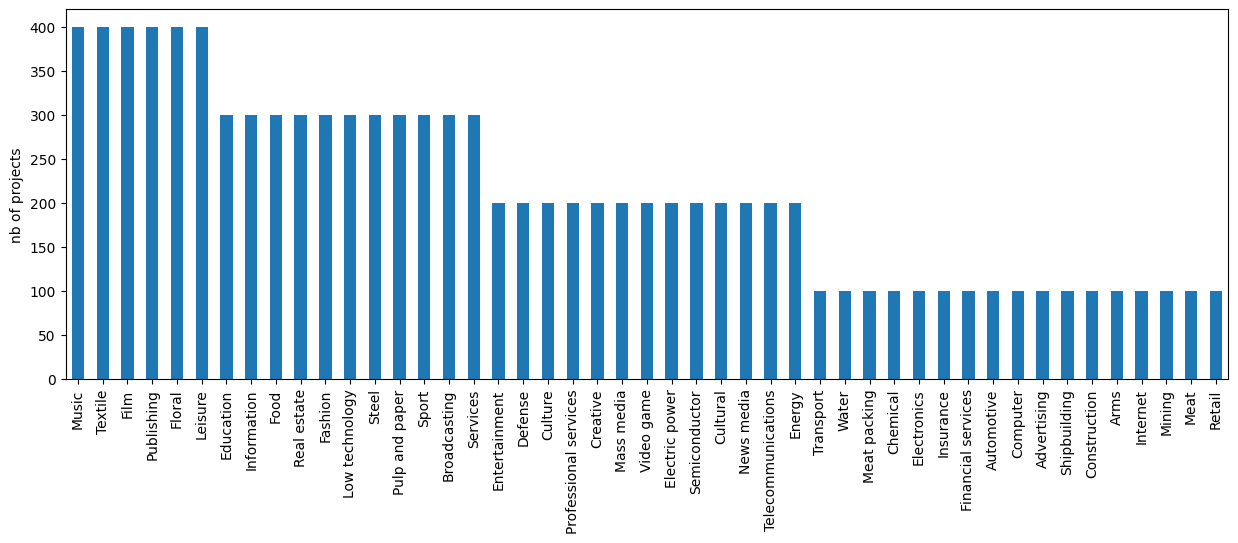

In [10]:
f = plt.figure()
f.set_figwidth(15)
plt.ylabel("nb of projects")
df['industry'].value_counts().plot(kind='bar')

The industries that have the most projects are Film, Textile, Music, Leisure, Floral and Publishing.

In [11]:
#f = plt.figure()
#f.set_figwidth(15)
#plt.ylabel("nb of projects")
unassigned = {k[0]:v for k, v in df_industry['isUnassigned'].value_counts().items() if k[1] == True}

<BarContainer object of 47 artists>

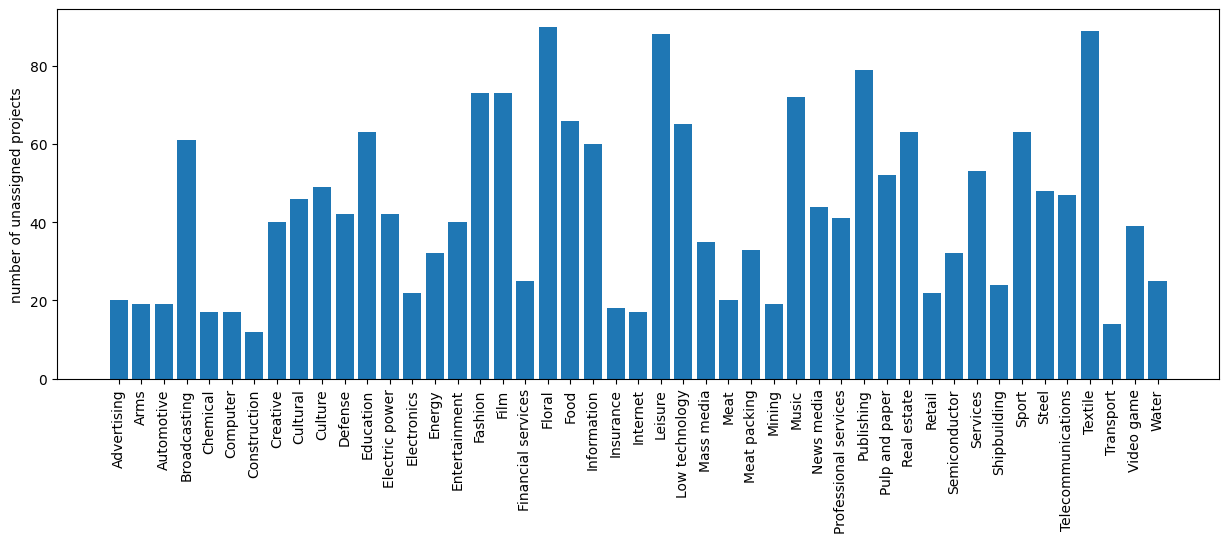

In [12]:
f = plt.figure()
f.set_figwidth(15)
plt.xticks(rotation='vertical')
plt.ylabel("number of unassigned projects")
plt.bar(unassigned.keys(), unassigned.values())

The industries looking for the most talents are the Floral, Leisure and Textile ones. Construction is not looking for many talents.

### Investigating office cities

In [13]:
df_flattened.groupby('officePostalCode').nunique()

,id,originalId,talentId,talentName,talentGrade,bookingGrade,operatingUnit,officeCity,jobManagerName,jobManagerId,totalHours,startDate,endDate,clientName,clientId,industry,isUnassigned,requiredSkills.0.name,requiredSkills.0.category,requiredSkills.1.name,requiredSkills.1.category,requiredSkills.2.name,requiredSkills.2.category,optionalSkills.0.name,optionalSkills.0.category,requiredSkills.3.name,requiredSkills.3.category
officePostalCode,,,,,,,,,,,,,,,,,,,,,,,,,,,
00130,8,8,5,5,2,5,6,8,8,8,7,8,8,8,8,8,2,4,2,4,2,3,2,6,2,1,1
00211,8,8,6,6,5,4,6,8,8,8,7,8,8,7,7,6,2,6,2,2,2,0,0,4,2,0,0
00274,4,4,4,4,3,2,4,4,4,4,4,4,4,4,4,4,2,1,1,1,1,0,0,3,2,0,0
00294,13,13,11,11,7,4,8,13,13,13,12,13,13,12,12,12,2,6,2,5,2,3,2,7,2,2,2
00448,7,7,7,7,5,2,4,7,7,7,5,7,7,7,7,7,2,4,2,2,2,3,2,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99428,6,6,4,4,3,3,4,6,6,6,6,6,6,6,6,6,2,2,2,1,1,1,1,4,2,0,0
99682,10,10,9,9,6,3,6,10,10,10,9,10,10,10,10,10,2,5,2,3,2,2,2,4,2,1,1
99689,6,6,6,6,5,2,4,6,6,6,6,6,6,5,5,5,2,3,1,2,1,3,2,6,2,1,1


In [14]:
df_flattened.groupby('officeCity').nunique()

,id,originalId,talentId,talentName,talentGrade,bookingGrade,operatingUnit,officePostalCode,jobManagerName,jobManagerId,totalHours,startDate,endDate,clientName,clientId,industry,isUnassigned,requiredSkills.0.name,requiredSkills.0.category,requiredSkills.1.name,requiredSkills.1.category,requiredSkills.2.name,requiredSkills.2.category,optionalSkills.0.name,optionalSkills.0.category,requiredSkills.3.name,requiredSkills.3.category
officeCity,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ahaus,19,19,15,15,6,6,9,18,19,19,16,19,19,17,17,12,2,8,2,7,2,5,2,10,2,3,2
Altentreptow,32,32,23,23,7,6,10,32,32,32,24,32,32,31,31,22,2,11,2,10,2,6,2,11,2,3,1
Altötting,40,40,32,32,7,5,10,39,40,40,23,40,40,32,32,22,2,10,2,8,2,6,2,10,2,3,2
Angermünde,27,27,23,23,7,4,9,27,27,27,18,27,27,26,26,19,2,6,2,6,2,5,2,8,2,5,2
Anklam,7,7,5,5,4,4,5,7,7,7,6,7,7,7,7,7,2,4,2,2,2,2,1,4,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wunsiedel,17,17,14,14,7,4,9,17,17,17,15,17,17,16,16,16,2,8,2,7,2,6,2,9,2,6,2
Wurzen,12,12,11,11,6,3,7,12,12,12,12,12,12,10,10,9,2,7,2,8,2,5,2,6,2,4,2
Zerbst,13,13,11,11,6,3,6,13,13,13,11,13,13,11,11,11,2,6,2,5,2,3,2,7,2,1,1


On a sidenote, an office city can be associated with many office postal codes. For instance, Altötting appears with 39 different postal codes.

In [15]:
df_flattened['officeCity'].value_counts(ascending=False)[:3]

Stade          101
Großenhain      78
Gerolzhofen     76
Name: officeCity, dtype: int64

The 3 cities with the most projects are Stade, Großenhain, Gerolzhofen.

In [16]:
df_flattened['officeCity'].value_counts(ascending=True)[:3]

Gunzenhausen    3
Calau           4
Beilngries      5
Name: officeCity, dtype: int64

The 3 cities with the least projects are Gunzenhausen, Calau, Beilngries.

In [17]:
unassignedCities = df_flattened.groupby('officeCity')['isUnassigned'].value_counts()

In [18]:
unassignedCities

officeCity    isUnassigned
Ahaus         False           14
              True             5
Altentreptow  False           22
              True            10
Altötting     False           34
                              ..
Zerbst        True             3
Zossen        False           27
              True             9
Zschopau      False           13
              True             5
Name: isUnassigned, Length: 715, dtype: int64

In [19]:
cities = [k[0] for k in unassignedCities.keys()]

In [20]:
unassignedProjects = [v for k, v in unassignedCities.items() if k[1] == True]

In [21]:
unassignedProjects, cities = zip(*sorted(zip(unassignedProjects, cities), key=lambda x: x[0]))

In [22]:
cities[:3]

('Ansbach', 'Arnstadt', 'Bad Brückenau')

Ansbach, Arnstadt and Bad Brückenau are among the cities that are looking for the least talents (one).

In [23]:
cities[-3:]

('Halberstadt', 'Haldensleben', 'Heiligenstadt')

In [24]:
unassignedProjects[-3:]

(17, 17, 24)

Halberstadt, Haldensleben and Heiligenstadt are among the cities that are looking for the most talents (17 and 24).

In [25]:
df_flattened.groupby('officeCity')['industry'].value_counts(ascending=False)

officeCity  industry    
Ahaus       Fashion         3
            Floral          3
            Education       2
            Food            2
            Textile         2
                           ..
Zschopau    Shipbuilding    1
            Sport           1
            Textile         1
            Video game      1
            Water           1
Name: industry, Length: 6700, dtype: int64

In [26]:
df_flattened.groupby('industry')['officeCity'].value_counts(ascending=False)

industry     officeCity 
Advertising  Erbisdorf      3
             Stade          3
             Erfurt         2
             Gießen         2
             Großenhain     2
                           ..
Water        Wanzleben      1
             Wernigerode    1
             Wertingen      1
             Wiedenbrück    1
             Zschopau       1
Name: officeCity, Length: 6700, dtype: int64

### Investigating Grades

In [27]:
df_flattened['grade'] = df_flattened['talentGrade'] + df_flattened['bookingGrade']
df['grade'] = df_flattened['talentGrade'] + df_flattened['bookingGrade']

In [28]:
df_flattened.groupby('grade')['totalHours'].mean()

grade
Associate           24.003036
Intern              23.879037
Lead Associate      23.899181
Manager             23.934721
Senior Associate    24.063604
Senior Manager      24.466530
Name: totalHours, dtype: float64

The grade needed for a project does not depend on the number of hours for this project. Skills don't depend on the grade.

In [29]:
df_flattened.groupby('grade').nunique()

,id,originalId,talentId,talentName,talentGrade,bookingGrade,operatingUnit,officeCity,officePostalCode,jobManagerName,jobManagerId,totalHours,startDate,endDate,clientName,clientId,industry,isUnassigned,requiredSkills.0.name,requiredSkills.0.category,requiredSkills.1.name,requiredSkills.1.category,requiredSkills.2.name,requiredSkills.2.category,optionalSkills.0.name,optionalSkills.0.category,requiredSkills.3.name,requiredSkills.3.category
grade,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Associate,1647,1647,122,122,2,2,10,350,809,1517,1517,33,1643,1647,100,100,47,2,11,2,11,2,11,2,11,2,11,2
Intern,1827,1827,135,135,2,2,10,353,833,1666,1666,33,1826,1823,99,99,47,2,11,2,11,2,11,2,11,2,11,2
Lead Associate,1587,1587,110,110,2,2,10,344,800,1467,1467,33,1583,1582,100,100,47,2,11,2,11,2,11,2,11,2,11,2
Manager,1777,1777,129,129,2,2,10,344,844,1612,1613,33,1773,1774,98,98,47,2,11,2,11,2,11,2,11,2,11,2
Senior Associate,1698,1698,124,124,2,2,10,346,823,1547,1547,33,1689,1695,99,99,47,2,11,2,11,2,11,2,11,2,11,2
Senior Manager,1464,1464,104,104,2,2,10,339,778,1349,1349,33,1461,1461,100,100,47,2,11,2,11,2,11,2,11,2,11,2


In [30]:
df['numberSkills'] = df['requiredSkills'].apply(len)

In [31]:
df.groupby('grade')['numberSkills'].mean()

grade
Associate           1.697632
Intern              1.689108
Lead Associate      1.639572
Manager             1.687113
Senior Associate    1.619552
Senior Manager      1.640710
Name: numberSkills, dtype: float64

In [32]:
mapping = {'Intern':0,'Associate':1,'Lead Associate':2,'Senior Associate':3,'Manager':4,'Senior Manager':5}

In [33]:
df['gradeId'] = df['grade'].map(mapping)

In [34]:
skillsVSGrade = df.groupby('gradeId')['numberSkills'].mean()

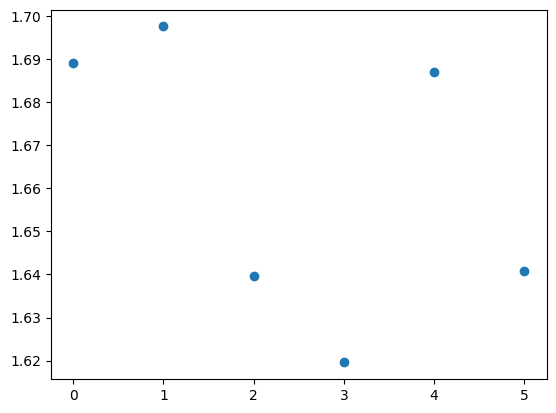

In [35]:
plt.scatter(skillsVSGrade.keys(), skillsVSGrade.values)

There is no correlation between the number of skills required and the grade for a project.

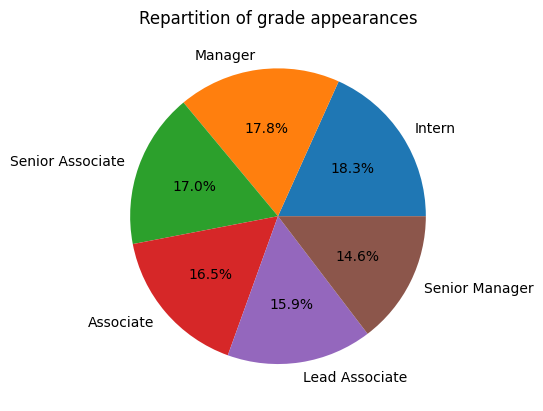

In [43]:
df_flattened['grade'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Repartition of grade appearances')
plt.show()

### Investigating skills

In [41]:
skills = {}
for i in range(0,4):
    for skill, occ in df_flattened['requiredSkills.'+str(i)+'.name'].value_counts().items():
        skills[skill] = skills.get(skill, 0) + occ

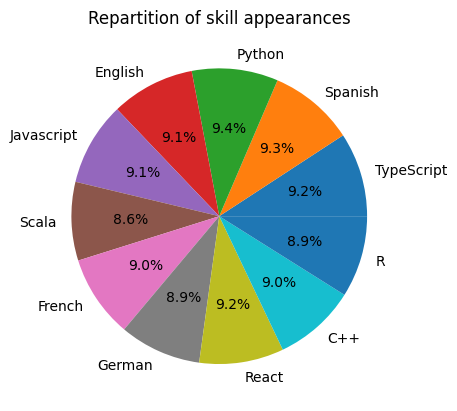

In [44]:
plt.pie(skills.values(), labels=skills.keys(), autopct='%1.1f%%')
plt.title('Repartition of skill appearances')
plt.show()

# Insights

A talent (including managers) can work in different operating units and different cities. It would be useful to check if they can work on multiple projects (and in multiple cities) at the same time. A list of talent skills could help to assign a talent with necessary skills on a project. 

An office postal code is linked with multiple office cities in the dataset (investigating office cities).

No correlation has been found between any set of attributes.